In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.ticker import PercentFormatter
import re 
# --- Plotting Style Setup ---

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

df = pd.read_csv('Policy_2024.csv')


C:\Users\asus\AppData\Local\Temp\ipykernel_24592\2262301827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Knowledge Area', data=df, order=df['Knowledge Area'].value_counts().index, palette='crest')


<Figure size 1400x700 with 0 Axes>

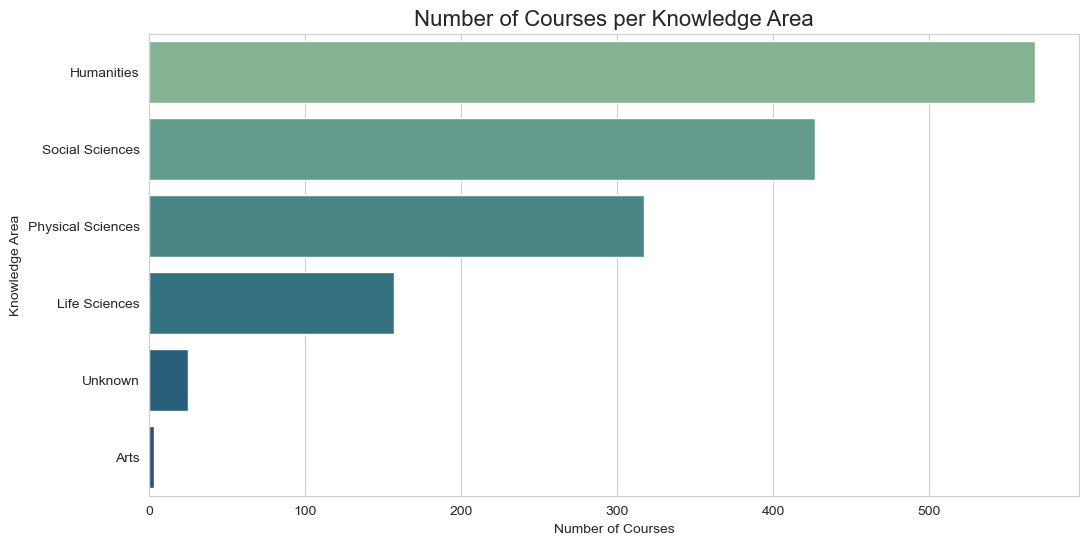

In [16]:
# Course Distribution by Knowledge Area
plt.figure(figsize=(14, 7))
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='Knowledge Area', data=df, order=df['Knowledge Area'].value_counts().index, palette='crest')
ax.set_title('Number of Courses per Knowledge Area', fontsize=16)
ax.set_xlabel('Number of Courses')
ax.set_ylabel('Knowledge Area')
plt.show()



C:\Users\asus\AppData\Local\Temp\ipykernel_24592\2507680682.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_departments.values, y=top_departments.index, palette='plasma')


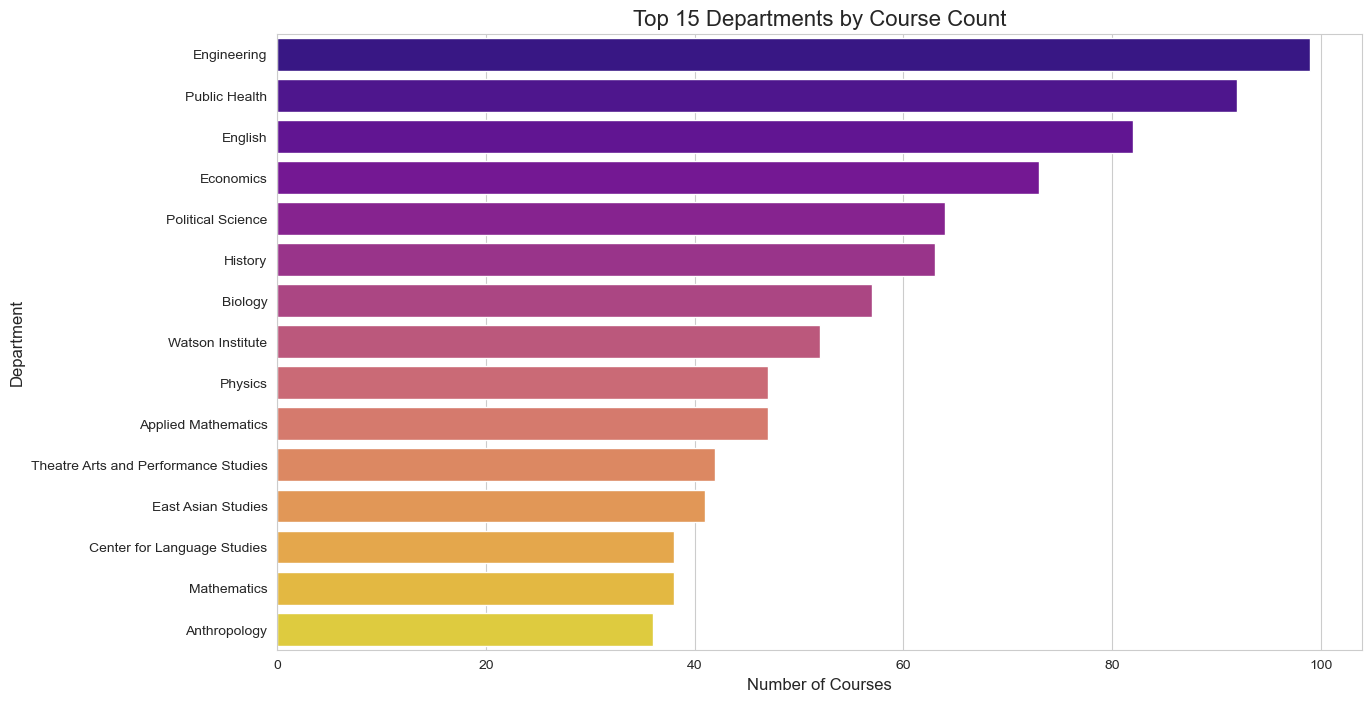

In [17]:
# the distribution of Departments (Top 15) 
top_n = 15
top_departments = df['Department'].value_counts().nlargest(top_n)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=top_departments.values, y=top_departments.index, palette='plasma')
ax.set_title(f'Top {top_n} Departments by Course Count', fontsize=16)
ax.set_xlabel('Number of Courses', fontsize=12)
ax.set_ylabel('Department', fontsize=12)
plt.show()

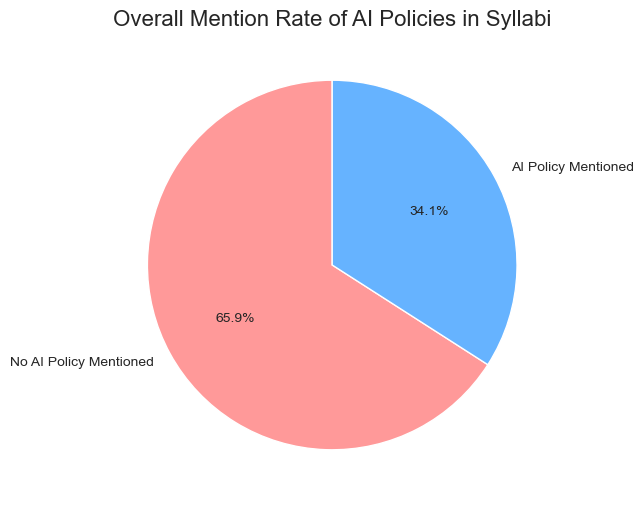

In [18]:
#  Overall AI Policy mention rate 
df['Has AI Policy'] = df['AI Policy'].notna()

policy_counts = df['Has AI Policy'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(policy_counts, labels=['No AI Policy Mentioned', 'AI Policy Mentioned'], autopct='%1.1f%%', 
        startangle=90, colors=['#ff9999','#66b3ff'], wedgeprops={'edgecolor': 'white'})
plt.title('Overall Mention Rate of AI Policies in Syllabi', fontsize=16)
plt.ylabel('')
plt.show()



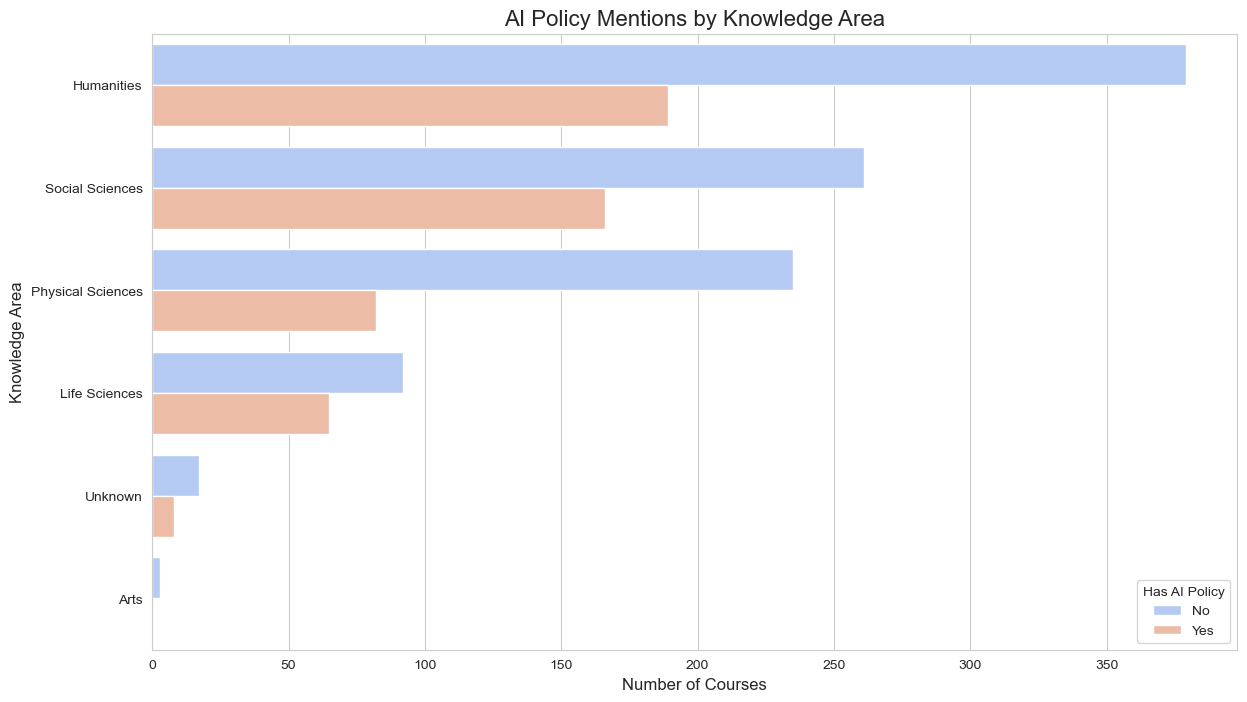

C:\Users\asus\AppData\Local\Temp\ipykernel_24592\91933577.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=policy_rate_by_ka.values, y=policy_rate_by_ka.index, palette='mako')


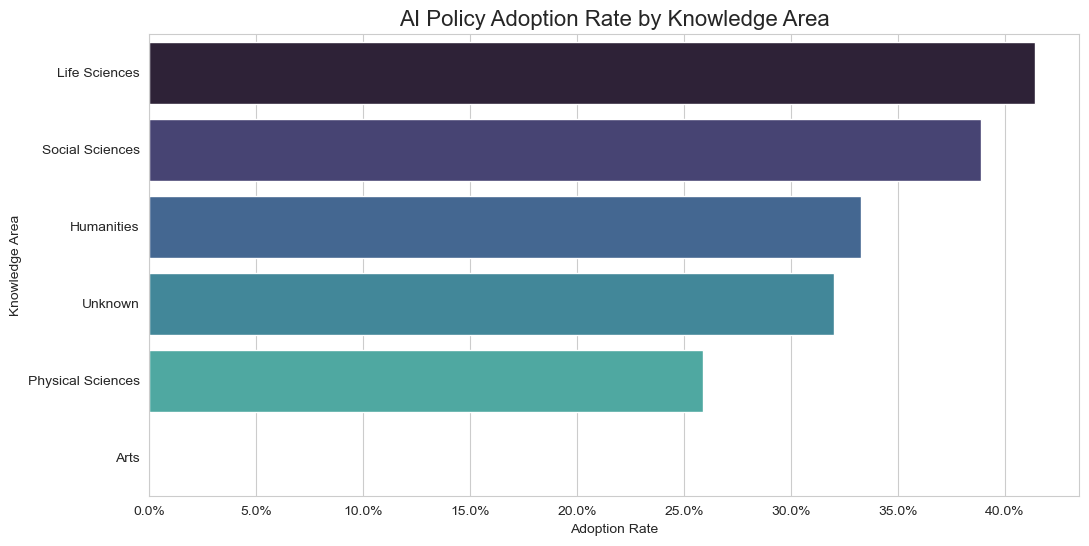

In [19]:
#  AI Policy mention rate across different Knowledge Areas 
plt.figure(figsize=(14, 8))
ax = sns.countplot(y='Knowledge Area', hue='Has AI Policy', data=df, 
                   order=df['Knowledge Area'].value_counts().index, palette='coolwarm')
plt.title('AI Policy Mentions by Knowledge Area', fontsize=16)
plt.xlabel('Number of Courses', fontsize=12)
plt.ylabel('Knowledge Area', fontsize=12)
plt.legend(title='Has AI Policy', labels=['No', 'Yes'])
plt.show()


policy_rate_by_ka = df.groupby('Knowledge Area')['Has AI Policy'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=policy_rate_by_ka.values, y=policy_rate_by_ka.index, palette='mako')
ax.set_title('AI Policy Adoption Rate by Knowledge Area', fontsize=16)
ax.set_xlabel('Adoption Rate')
ax.set_ylabel('Knowledge Area')
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_24592\1316405982.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_dept_rates.values, y=top_dept_rates.index, palette='rocket')


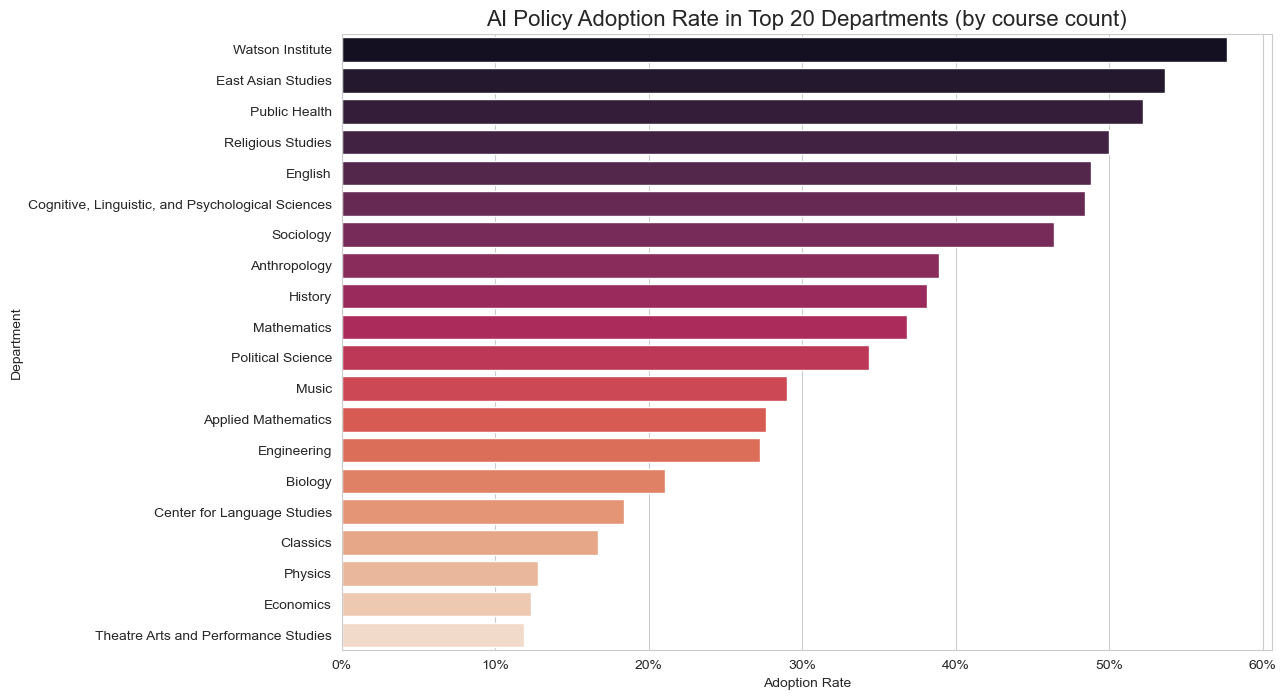

In [20]:
# AI Policy Rate by Top N Departments
TOP_N_DEPTS = 20
df['Has AI Policy'] = df['AI Policy'].notna()
policy_rate_by_dept = df.groupby('Department')['Has AI Policy'].mean()
top_depts_by_count = df['Department'].value_counts().nlargest(TOP_N_DEPTS).index
top_dept_rates = policy_rate_by_dept.loc[top_depts_by_count].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_dept_rates.values, y=top_dept_rates.index, palette='rocket')
ax.set_title(f'AI Policy Adoption Rate in Top {TOP_N_DEPTS} Departments (by course count)', fontsize=16)
ax.set_xlabel('Adoption Rate')
ax.set_ylabel('Department')
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_24592\4189226657.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=policy_rate_major_depts.values, y=policy_rate_major_depts.index, palette='viridis')



Found 41 departments with 10 or more courses.


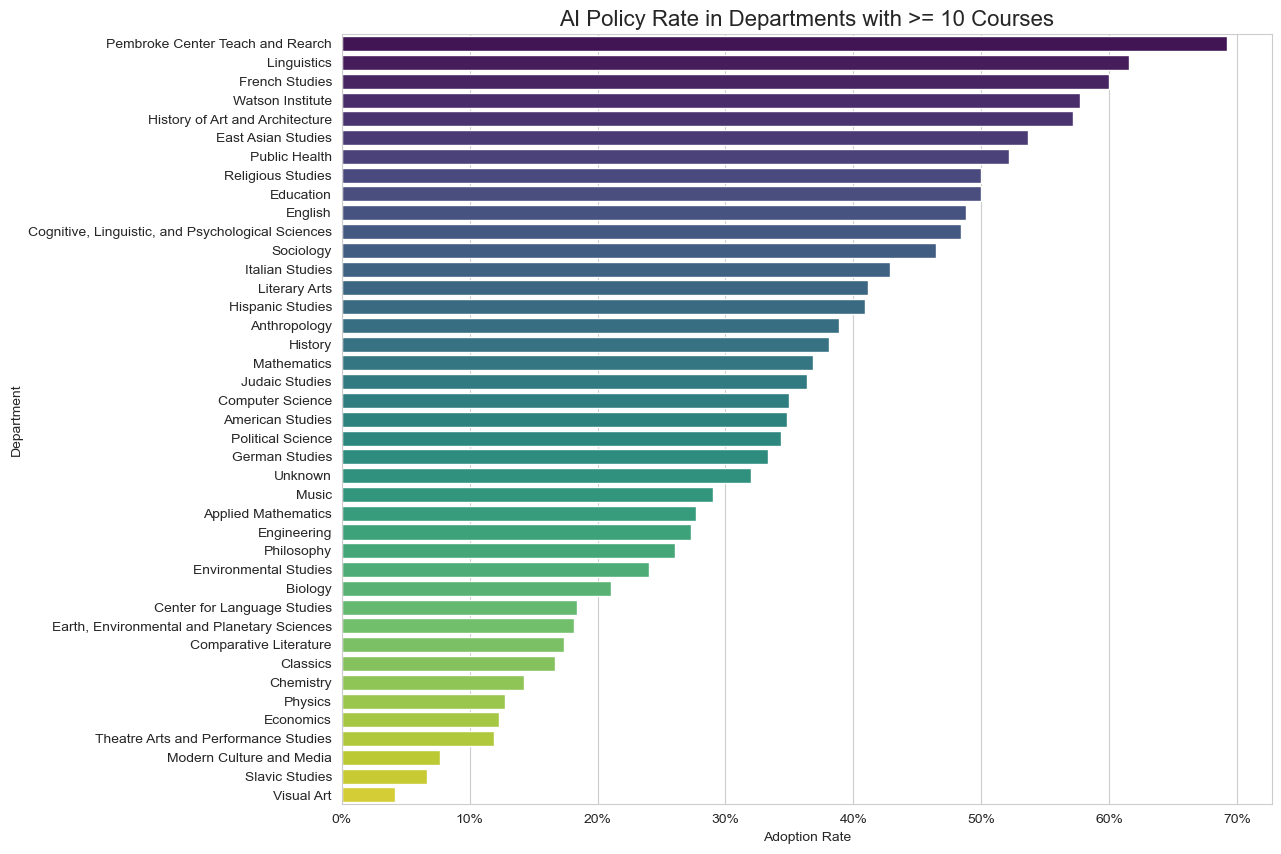

In [21]:
# Analysis on departments with at least 10 courses

MIN_COURSES_DEPT = 10  

dept_counts = df['Department'].value_counts()
major_depts = dept_counts[dept_counts >= MIN_COURSES_DEPT].index

df_major_depts = df[df['Department'].isin(major_depts)]
policy_rate_major_depts = df_major_depts.groupby('Department')['Has AI Policy'].mean().sort_values(ascending=False)

print(f"\nFound {len(major_depts)} departments with {MIN_COURSES_DEPT} or more courses.")

plt.figure(figsize=(12, 10))
ax = sns.barplot(x=policy_rate_major_depts.values, y=policy_rate_major_depts.index, palette='viridis')
ax.set_title(f'AI Policy Rate in Departments with >= {MIN_COURSES_DEPT} Courses', fontsize=16)
ax.set_xlabel('Adoption Rate')
ax.set_ylabel('Department')
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_24592\606843097.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_prefix_rates.values, y=top_prefix_rates.index, palette='rocket')


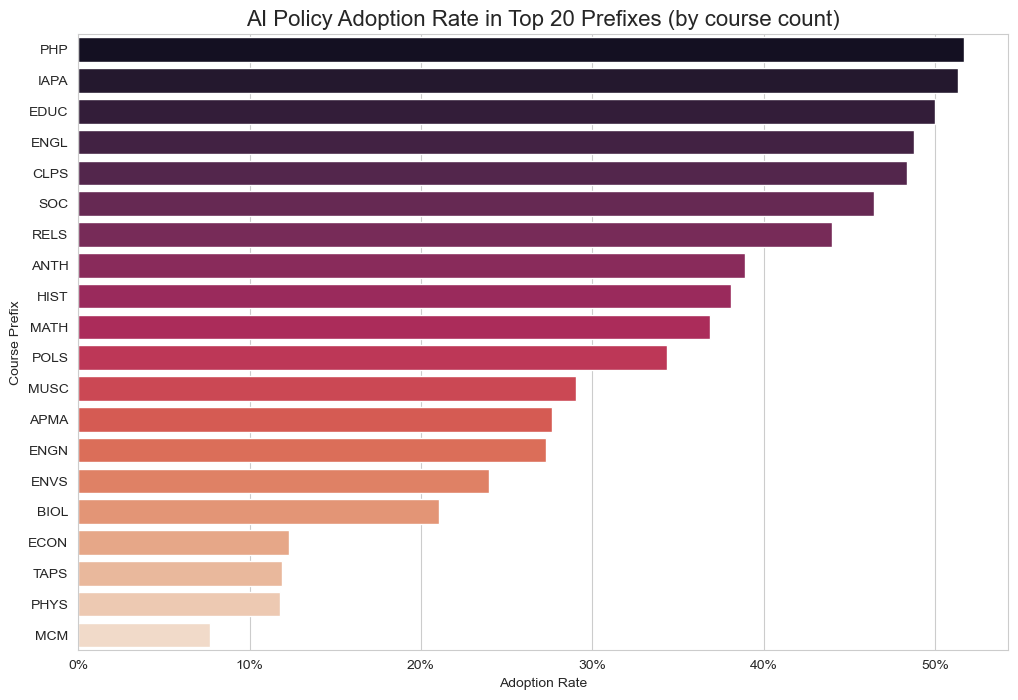

In [22]:
df['Course Code String'] = df['Course Code'].str.split(' ').str[0]
df['Prefix List'] = df['Course Code String'].str.split('/')
df_exploded_prefix = df.explode('Prefix List')

df_exploded_prefix.rename(columns={'Prefix List': 'Course Prefix'}, inplace=True)
df_exploded_prefix.dropna(subset=['Course Prefix'], inplace=True)

TOP_N_PREFIXES = 20

policy_rate_by_prefix = df_exploded_prefix.groupby('Course Prefix')['Has AI Policy'].mean()


top_prefixes_by_count = df_exploded_prefix['Course Prefix'].value_counts().nlargest(TOP_N_PREFIXES).index


top_prefix_rates = policy_rate_by_prefix.loc[top_prefixes_by_count].sort_values(ascending=False)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_prefix_rates.values, y=top_prefix_rates.index, palette='rocket')
ax.set_title(f'AI Policy Adoption Rate in Top {TOP_N_PREFIXES} Prefixes (by course count)', fontsize=16)
ax.set_xlabel('Adoption Rate')
ax.set_ylabel('Course Prefix')
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_24592\3148525397.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=policy_rate_major_prefixes.values, y=policy_rate_major_prefixes.index, palette='viridis')



Found 42 prefixes with 10 or more courses.


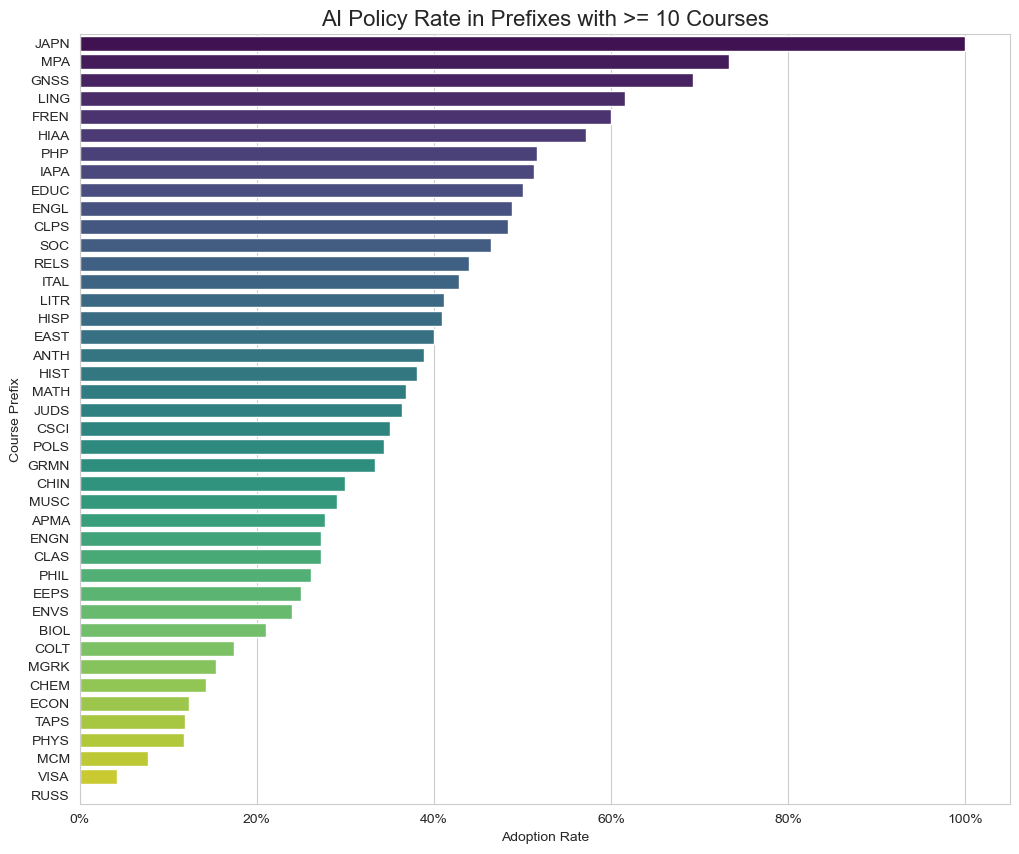

In [23]:
MIN_COURSES_PREFIX = 10  

prefix_counts = df_exploded_prefix['Course Prefix'].value_counts()

major_prefixes = prefix_counts[prefix_counts >= MIN_COURSES_PREFIX].index

df_major_prefixes = df_exploded_prefix[df_exploded_prefix['Course Prefix'].isin(major_prefixes)]

policy_rate_major_prefixes = df_major_prefixes.groupby('Course Prefix')['Has AI Policy'].mean().sort_values(ascending=False)

print(f"\nFound {len(major_prefixes)} prefixes with {MIN_COURSES_PREFIX} or more courses.")

plt.figure(figsize=(12, 10))
ax = sns.barplot(x=policy_rate_major_prefixes.values, y=policy_rate_major_prefixes.index, palette='viridis')
ax.set_title(f'AI Policy Rate in Prefixes with >= {MIN_COURSES_PREFIX} Courses', fontsize=16)
ax.set_xlabel('Adoption Rate')
ax.set_ylabel('Course Prefix')
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
plt.show()

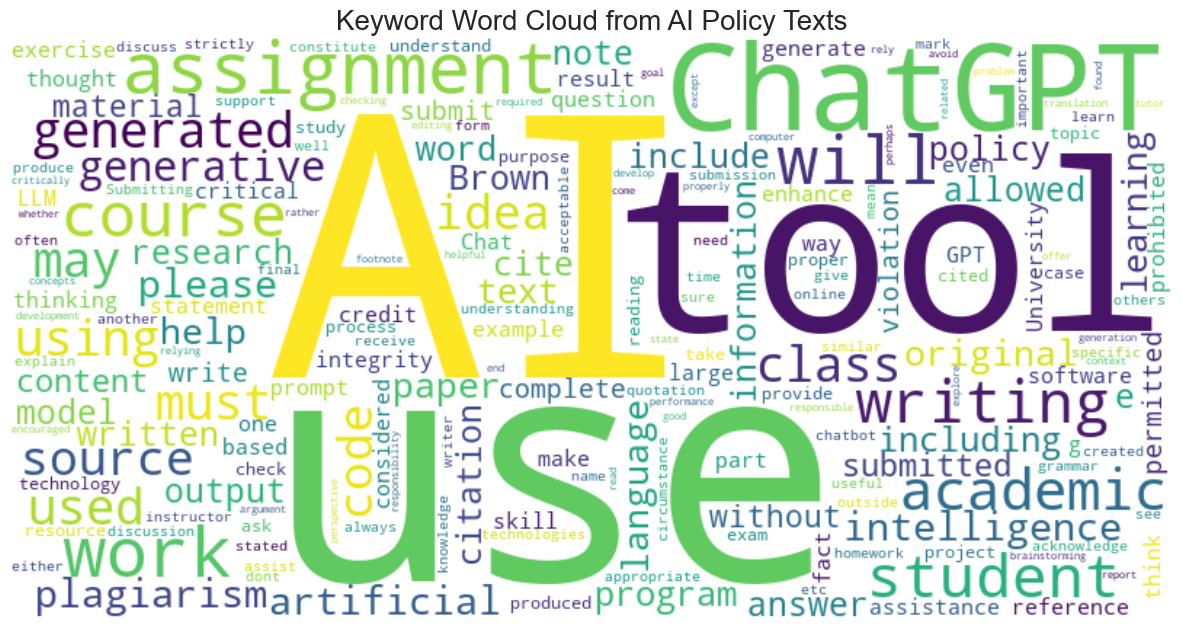

In [24]:
# Generate a Word Cloud from the text of AI Policies 
ai_policies_text = " ".join(df['AI Policy'].dropna())

if ai_policies_text:
    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(ai_policies_text)
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Keyword Word Cloud from AI Policy Texts', fontsize=20)
    plt.show()
else:
    print("No AI policy text found to generate a word cloud.")

C:\Users\asus\AppData\Local\Temp\ipykernel_24592\4194719078.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=level_policy_rate.index, y=level_policy_rate.values, palette='coolwarm',


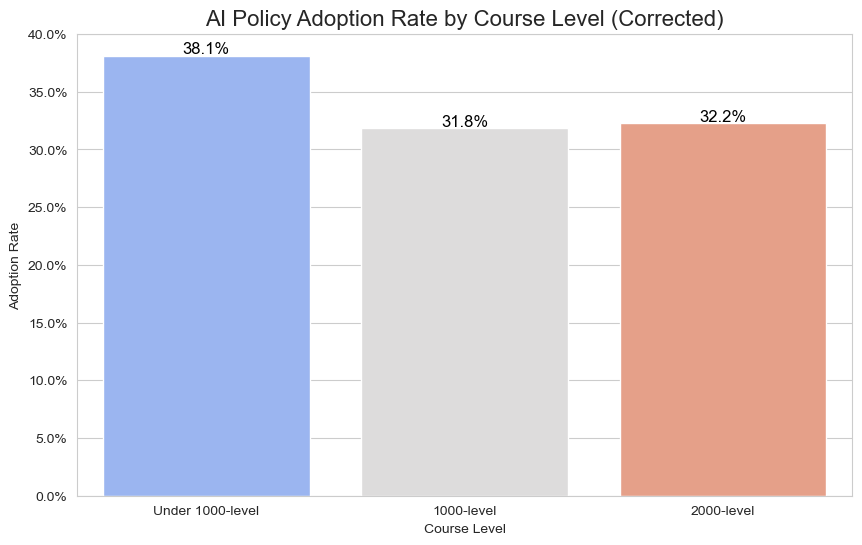

In [25]:

def get_course_level(code):

    if pd.isna(code):
        return 'Unknown'
    
    parts = str(code).split()
    
    if len(parts) > 1:

        match = re.search(r'^\d+', parts[1]) 
        if match:
            level_num = int(match.group(0)) 
            

            if level_num < 1000:
                return 'Under 1000-level'
            elif 1000 <= level_num < 2000:
                return '1000-level'
            elif 2000 <= level_num < 3000:
                return '2000-level'
                
    return 'Unknown' 


df['Course Level'] = df['Course Code'].apply(get_course_level)




level_policy_rate = df.groupby('Course Level')['Has AI Policy'].mean().sort_index()


level_policy_rate = level_policy_rate.drop('Unknown', errors='ignore')


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=level_policy_rate.index, y=level_policy_rate.values, palette='coolwarm',
                 order=['Under 1000-level', '1000-level', '2000-level'])
ax.set_title('AI Policy Adoption Rate by Course Level (Corrected)', fontsize=16)
ax.set_xlabel('Course Level')
ax.set_ylabel('Adoption Rate')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_24592\2010800714.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=stance_counts.index, y=stance_counts.values, palette='Set2')


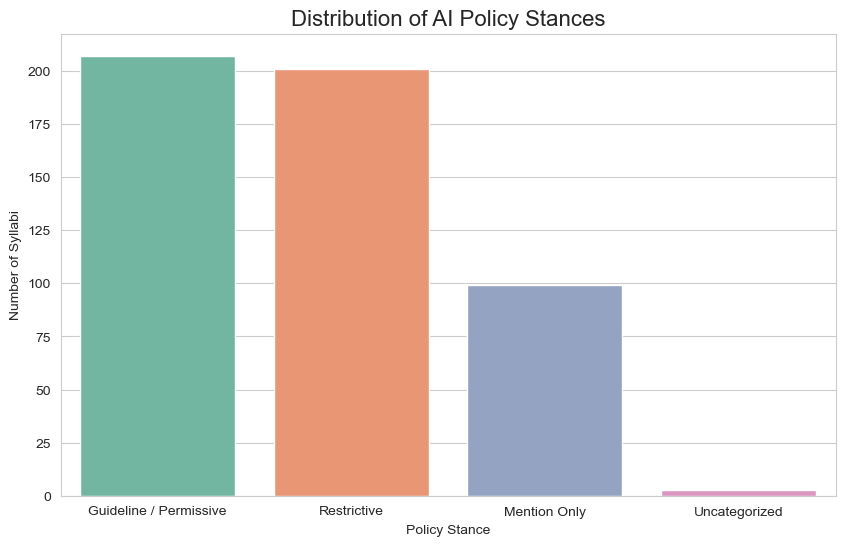

In [26]:

def classify_policy_stance(policy):
    if pd.isna(policy):
        return 'No Policy'
    
    policy_lower = policy.lower()
    
    restrictive_keys = ['not allow','disallow', 'prohibit', 'not permit', 'forbidden', 'violation', 'unauthorized',  'academic dishonesty', 'not authorized']
    if any(key in policy_lower for key in restrictive_keys):
        return 'Restrictive'
    
    guideline_keys = ['allow', 'permit', 'encourage', 'tool', 'guide', 'cite', 'citation']
    if any(key in policy_lower for key in guideline_keys):
        return 'Guideline / Permissive'
    
    mention_keys = ['ai','chatgpt', 'artificial intelligence']
    if any(key in policy_lower for key in mention_keys):
        return 'Mention Only'
        
    return 'Uncategorized' 

df['Policy Stance'] = df['AI Policy'].apply(classify_policy_stance)


stance_counts = df[df['Has AI Policy'] == True]['Policy Stance'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=stance_counts.index, y=stance_counts.values, palette='Set2')
ax.set_title('Distribution of AI Policy Stances', fontsize=16)
ax.set_xlabel('Policy Stance')
ax.set_ylabel('Number of Syllabi')
plt.show()

In [27]:
# df[df['Policy Stance'] == 'Uncategorized']['AI Policy']

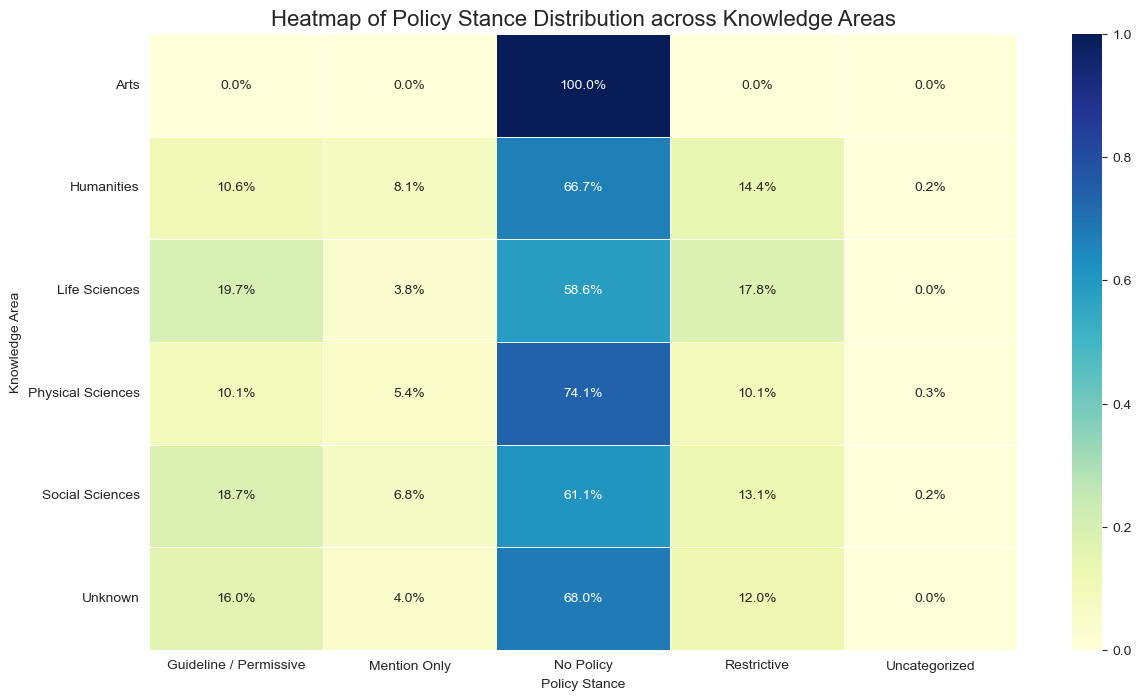

In [28]:
# Cross table
crosstab_ka_stance = pd.crosstab(df['Knowledge Area'], df['Policy Stance'])
crosstab_norm = pd.crosstab(df['Knowledge Area'], df['Policy Stance'], normalize='index')

plt.figure(figsize=(14, 8))
sns.heatmap(
    crosstab_norm, 
    annot=True,          
    fmt=".1%",           
    cmap="YlGnBu",       
    linewidths=.5
)
plt.title('Heatmap of Policy Stance Distribution across Knowledge Areas', fontsize=16)
plt.xlabel('Policy Stance')
plt.ylabel('Knowledge Area')
plt.show()